Monte Carlo Stock Price Simulation


note: the only required hard code is the stock price as defined by assets below.
    For convenience, plot properties such as bins # may need to be changed to suit proper orientation.

In [8]:

import pandas as pd
import numpy as np
import scipy.stats as sci
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as pdr
import yfinance as yfin


assets : list with the stock ticker
start : start date of the data
today : today's date
df_prices: empty dataset to store the acquired data
yahooData (dataframe, assets_list, start_date, end_date): function that receives an empty dataset, an assets list, a start date and an end date. Returns the stock's price data set.
df = dataframe with the stored info
S0 = the initial price of the stock (needed later)

In [9]:
#choose what stock you want
assets = ["ERII"]

#Define the start date as the day you want
start = "2008-07-01"
#end date is today
today = datetime.today().strftime('%Y-%m-%d')

#Define the empty dataframe
df_prices = pd.DataFrame()

In [10]:
#give functions parameters from above
yfin.pdr_override()
def YahooData(dataframe, assets_list, start_date, end_date):
    for i in assets_list:
        dataframe[i] = pdr.get_data_yahoo(i,start = start, end = today)["Adj Close"]

    return dataframe

#name dataframe as df
df= YahooData(df_prices,assets,start,today)
df

[*********************100%***********************]  1 of 1 completed


,ERII
Date,
2008-07-02,9.830000
2008-07-03,9.830000
2008-07-07,10.230000
2008-07-08,11.100000
2008-07-09,11.200000
2008-07-10,11.730000
2008-07-11,11.690000
2008-07-14,11.460000
2008-07-15,11.130000


In [11]:
#logarithmic returns

#Initial price of stock
S0 = df[str(assets[0])] [len(df)-1]

#we calculate the log returns of above imported data
df= np.log(df)
df = df.diff()
df = df.dropna()
pd.set_option('display.max_rows', None)
print(df)



                ERII
Date                
2008-07-03  0.000000
2008-07-07  0.039886
2008-07-08  0.081621
2008-07-09  0.008969
2008-07-10  0.046236
2008-07-11 -0.003416
2008-07-14 -0.019871
2008-07-15 -0.029219
2008-07-16 -0.010840
2008-07-17  0.009042
2008-07-18  0.068693
2008-07-21  0.033061
2008-07-22 -0.006525
2008-07-23 -0.009042
2008-07-24 -0.079011
2008-07-25 -0.063645
2008-07-28  0.043789
2008-07-29 -0.017472
2008-07-30  0.000000
2008-07-31  0.024738
2008-08-01  0.025906
2008-08-04  0.014880
2008-08-05 -0.018414
2008-08-06 -0.016957
2008-08-07 -0.015420
2008-08-08  0.005470
2008-08-11 -0.063812
2008-08-12 -0.008759
2008-08-13 -0.100701
2008-08-14  0.010753
2008-08-15  0.021165
2008-08-18 -0.009469
2008-08-19 -0.068917
2008-08-20  0.001132
2008-08-21  0.030086
2008-08-22  0.015251
2008-08-25 -0.016349
2008-08-26 -0.041509
2008-08-27 -0.008051
2008-08-28  0.028460
2008-08-29  0.011161
2008-09-02  0.024124
2008-09-03 -0.001084
2008-09-04 -0.023040
2008-09-05  0.000000
2008-09-08 -0

Modeling the Returns

PARAMETERS AND VARIABLES
mu = Daily Expected Return: calculated as the mean of the daily returns. Alternatively, could use CAPM, forward P/E projection, or opinion

var = Variance of the data. Can be historical or a moving average of CAPM / other form of variance

Drift = mu - 0.5 * var (as defined by the GBM formula)

Desvest = Standard deviation of the data

n_simulations = desired number of simulations

Days = number of days will be simulated, assuming 260 business days in a year

Epsilon = stochastic component generated by the inverse of the normal distribution (ie: normal term)

returns = simulated daily returns per GBM random walk
    returns_interval_1 = interval that is 1.96 standard deviation from its mean (this is for a 95% confidence interval. the 2 SD range for 95% is only an approximation, 1.96 is more accurate)
    returns_interval_2 = interval that is -1.96 standard deviation from its mean
    expected_returns = expected returns vector.

S0 = initial value (already defined above)
S = price of the stock at time t
    S_interval_1 = Price of stock 1 year from now of interval 1
    S_interval_2 = Price of stock 1 year from now of interval 2


In [12]:
#parameter operator definitions

mu = df.mean()
var = df.var()
drift = mu - (0.5*var)
desvest = df.std()
n_simulations = 100000
days = np.arange(250)

#variables used in model

epsilon = sci.norm.ppf(np.random.rand(len(days), n_simulations))
returns =  drift.values + desvest.values * epsilon
returns_interval_1 = np.zeros(len(days))
returns_interval_2 = np.zeros(len(days))
expected_returns = np.zeros(len(days))

for t in range(1, len(days)):
    returns_interval_1[t] = drift*(t-days[0]) + desvest *1.96*np.sqrt(t - days[0])
    returns_interval_2[t] = drift*(t-days[0]) + desvest *-1.96*np.sqrt(t - days[0])


S = np.zeros_like(returns)
S_interval_1 = np.zeros_like(returns_interval_1)
S_interval_2 = np.zeros_like(returns_interval_2)
S_interval_1[0] = S0
S_interval_2[0] = S0
S[0] = S0
expected_returns[0] = S0

#Price Modeling

for t in range(1, len(days)):
    S[t] = S[t-1]*np.exp(returns[t])
    S_interval_1[t] = S0*np.exp(returns_interval_1[t])
    S_interval_2[t] = S0*np.exp(returns_interval_2[t])
    expected_returns[t] = expected_returns[t-1]*np.exp(mu.values)

top_ten = np.percentile(S[len(days)-1], 100 - 10)
bottom_ten = np.percentile(S[len(days)-1], 10)



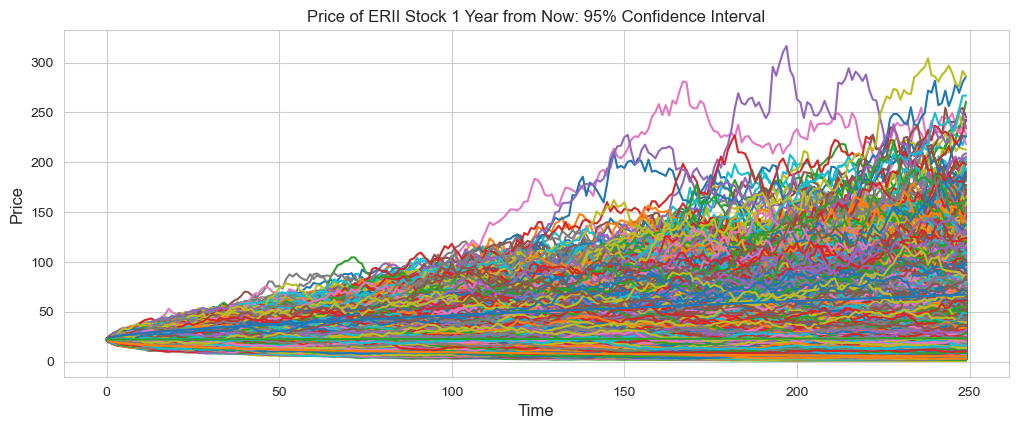

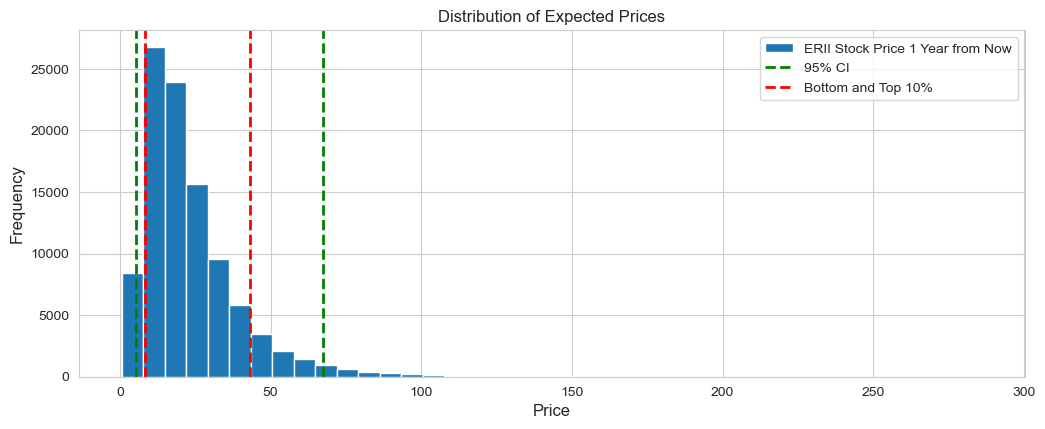

In [13]:
#plotting using plt
plt.figure(figsize=(12.2,4.5))
plt.plot(S)
plt.plot(S_interval_1)
plt.plot(S_interval_2)
plt.plot(expected_returns)
title = 'Price of ' + assets[0] + ' Stock 1 Year from Now: 95% Confidence Interval'
plt.title(title)
plt.xlabel('Time',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

title =  assets[0] + ' Stock Price 1 Year from Now'
plt.figure(figsize=(12.2,4.5))
plt.hist(S[len(days)-1], bins=40, label=title)
plt.xlabel('Price',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Distribution of Expected Prices')
plt.axvline(S_interval_1[len(days)-1], color='g', linestyle = 'dashed', linewidth = 2, label= '95% CI')
plt.axvline(S_interval_2[len(days)-1], color='g', linestyle = 'dashed', linewidth = 2)
plt.axvline(top_ten, color='r', linestyle = 'dashed', linewidth = 2, label= 'Bottom and Top 10%')
plt.axvline(bottom_ten, color='r', linestyle = 'dashed', linewidth = 2)
plt.legend()
plt.show()

In [15]:
#Numerical Printout for Confidence Interval

print("95% CI Upper Interval:", S_interval_1[len(days)-1])
print("95% CI Lower Interval:",S_interval_2[len(days)-1])
print("Mean Expected Price:",expected_returns[len(days)-1])
print("Expected Upside:", round(((np.mean(S[days-1]) - S0) / S0)*100, 2) , "%")

95% CI Upper Interval: 67.30497583256096
95% CI Lower Interval: 5.402170391707137
Mean Expected Price: 23.454195410103612
Expected Upside: 2.66 %
